In [19]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline
from preamble import *

c:\projects\introduction_to_ml_with_python\.venv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


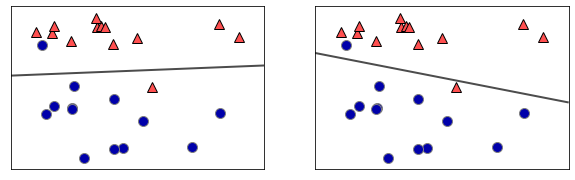

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)

    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)


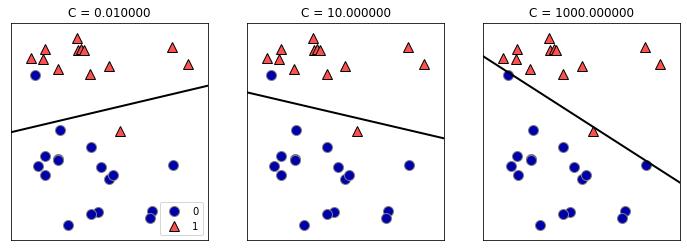

In [23]:
mglearn.plots.plot_linear_svc_regularization()

In [32]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42,
)

logr = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print(
    f'\ntraining: {logr.score(X_train, y_train)}',
    f'\ntest: {logr.score(X_test, y_test)}'
)

logr10 = LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)

print(
    f'\ntraining: {logr10.score(X_train, y_train)}',
    f'\ntest: {logr10.score(X_test, y_test)}'
)

logr001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)

print(
    f'\ntraining: {logr001.score(X_train, y_train)}',
    f'\ntest: {logr001.score(X_test, y_test)}'
)


training: 0.9577464788732394 
test: 0.958041958041958

training: 0.9741784037558685 
test: 0.965034965034965

training: 0.9530516431924883 
test: 0.951048951048951


array([ 0.757,  0.141, -0.296,  0.027, -0.163, -0.203, -0.433, -0.233,
       -0.268, -0.038, -0.044,  1.247,  0.115, -0.101, -0.021,  0.046,
       -0.028, -0.031, -0.034,  0.01 ,  0.086, -0.393, -0.075, -0.015,
       -0.309, -0.798, -1.317, -0.529, -0.735, -0.106])

([<matplotlib.axis.XTick at 0x1ee3171ce80>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'w

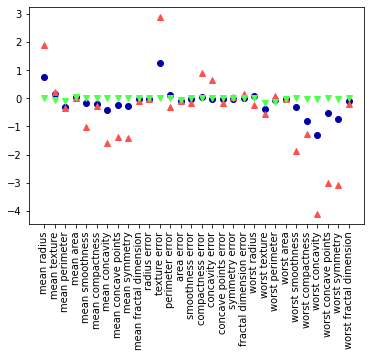

In [40]:

plt.plot(logr.coef_.T, 'o', label='C=1')
plt.plot(logr10.coef_.T, '^', label='C=10')
plt.plot(logr001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)